In [1]:
import numpy as np 
import math
import matplotlib.pyplot as plt
time_total = 10;
sample_rate = 1000
T = 1 / sample_rate
number = time_total / T
print('number type:',type(number))
print('number:',number)
N = int(number)
time = np.linspace(0,time_total,N,endpoint=False)
print('time shape:',time.shape)

number type: <class 'float'>
number: 10000.0
time shape: (10000,)


signal shape: (10000,)
sample of signal [ 11.43961      4.89170821   9.08436162   7.43749293   3.86016713
 -15.357141    -0.86149547 -13.04139119  -3.74711163  -7.32725568
  18.80159016  -2.62382702  16.38807061   0.73381473  10.04667936
 -21.43032142   5.23484956 -18.80968014   1.30378921]


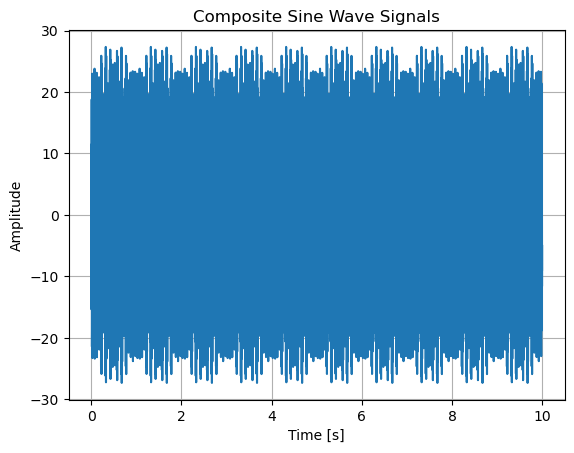

In [2]:
frequency_1 = 100 
frequency_2 = 301
frequency_3 = 490
magnitude_1 = 10
magnitude_2 = 5 
magnitude_3 = 13
signal_1 = magnitude_1*np.array([math.sin(2*math.pi*frequency_1*t) for t in time])
signal_2 = magnitude_2*np.array([math.sin(2*math.pi*frequency_2*t) for t in time])
signal_3 = magnitude_3*np.array([math.sin(2*math.pi*frequency_3*t) for t in time])
signal = signal_1 + signal_2 + signal_3
print('signal shape:',signal.shape)
print('sample of signal',signal[1:20])
%matplotlib inline
plt.figure(1) 
plt.plot(time,signal)
plt.title('Composite Sine Wave Signals')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

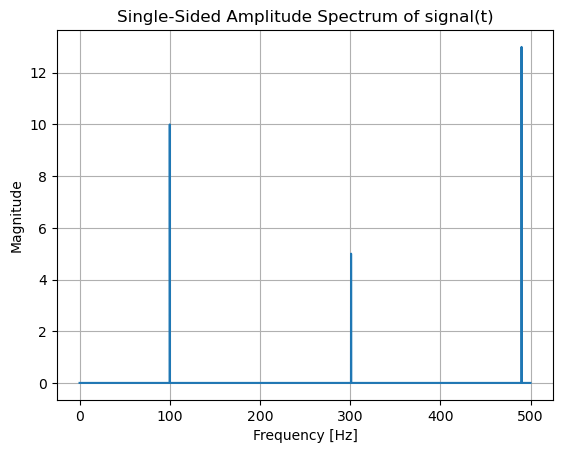

In [3]:
fft_result = np.fft.fft(signal)
freq = np.fft.fftfreq(N,d=1/sample_rate)
half_n = N // 2
positive_freqs = freq[:half_n]
magnitude = np.abs(fft_result)[:half_n] * 2 / N 
plt.figure(2)
%matplotlib inline
plt.plot(positive_freqs,magnitude)
plt.title('Single-Sided Amplitude Spectrum of signal(t)')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

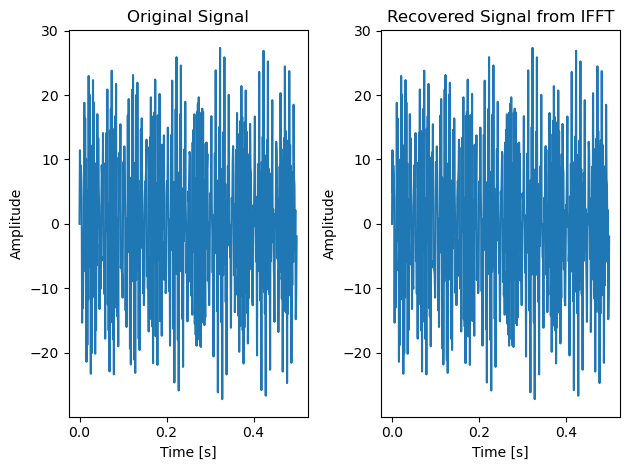

Are the original and recovered signals almost equal?  True


In [4]:
ifft_result = np.fft.ifft(fft_result)
recovered_signal = np.real(ifft_result)
plot_time = 0.5
plot_number = plot_time * sample_rate
nnum = int(plot_number)
plt.figure(3)
plt.subplot(1,2,1)
plt.plot(time[:nnum],signal[:nnum])
plt.title('Original Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.subplot(1,2,2)
plt.plot(time[:nnum],recovered_signal[:nnum])
plt.title('Recovered Signal from IFFT')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

print("Are the original and recovered signals almost equal? ", np.allclose(signal, recovered_signal))